# Unsupervised Learning tutorial

### Load data
* We'll be starting off using the iris dataset

In [1]:
#import datasets and matplotlib
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#import load_iris using datasets function and save as file name iris
iris = datasets.load_iris()

### Print out the dictionary keys and the dataset description
* Save data and target to their own variables, and print their shape

In [4]:
#print dictionary keys
for key in iris:
    print(key)
#alternative just iris.keys()

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [10]:
#print description of iris file
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
#savinf the data and target keys as variables data_array and target_array

data_array = iris['data']
target_array = iris['target']

In [12]:
print(data_array.shape, target_array.shape)

(150, 4) (150,)


In [39]:
import pandas as pd

df =pd.DataFrame(iris['data'], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df=df.assign(species =iris['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Use your target array to make a list (called color_list) with different colors for the different targets
* With matplotlib's scatter function, make 2D plots comparing the different dimensions (use the color_list to ID the different classes)

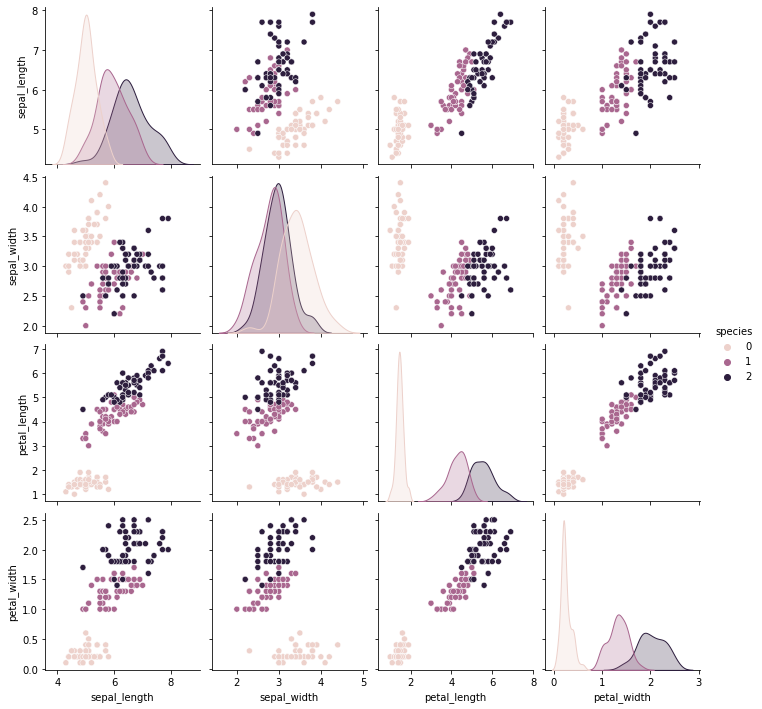

In [40]:
#alternative way of looking at scatterplots of the different variables using seaborn
import seaborn as sns
sns.pairplot(df, hue='species')

In [30]:
#making a new list called colour list, that assigns every value of 0, 1 or 2 to a colour (blue, green and red)
colour_list = []
for index, value in enumerate(target_array):
    if value == 0:
        colour_list.append('blue')
    elif value == 1:
        colour_list.append('green')
    elif value == 2:
        colour_list.append('red')
    else:
        print('something went wrong')

In [31]:
print(colour_list)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'r

In [27]:
#make 2D plots comparing the different dimensions (4: sepal length, sepal width, petal length, petal width) in the data_array

import numpy as np

#seperate the columns in data array and assign them variables
sepal_length = data_array[:,0]
sepal_width = data_array[:,1]
petal_length = data_array[:,2]
petal_width = data_array[:,3]

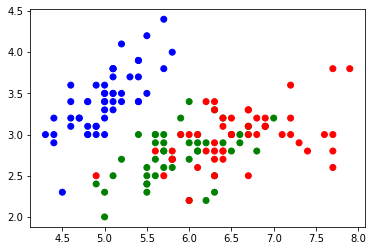

In [36]:
#make 2D scatter plots 

plt.scatter(sepal_length, sepal_width, c=colour_list)
#plt.scatter(sepal_width, colour_list)
#plt.scatter(petal_length, colour_list)
#plt.scatter(petal_width, colour_list)

Text(0, 0.5, 'sepal width (cm)')

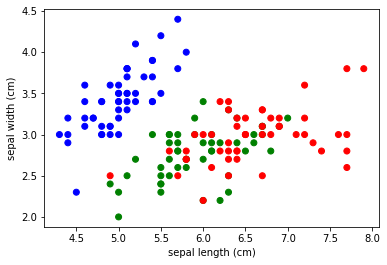

In [34]:
#plotting the 2D scatter plot using the scatter function

plt.scatter(data_array[:,0], data_array[:,1], c=colour_list)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
#plt.legend(iris.target_names[0][1])

### PCA
* Plot the transformed data
* print the explained variance

In [41]:
#import PCA function
from sklearn.decomposition import PCA

In [66]:
#transform the data

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_array)

In [67]:
#print explained variance ratio
#each of these points varies from each other, can measure the distance in all dimensions
#this describes show much of this variance you can capture with this number
#can see this reflected on the graph
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


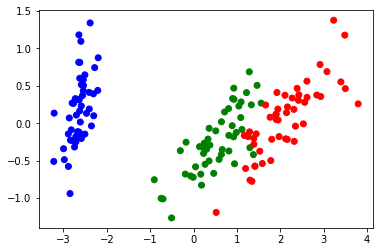

In [68]:
#plot the transformed data
plt.scatter(pca_data[:,0], pca_data[:,1], c =colour_list)

### t-SNE

In [ ]:
#t-SNE performs a non-linear transformation, tries to keep data points that are similar close together
#learning_rate='auto', init='random', perplexity=5: extras from array_TSNE run

In [69]:
#import TSNE
from sklearn.manifold import TSNE

In [79]:
#generating a new variable that generates the TSNE output
data_array_TSNE = TSNE(n_components=2).fit_transform(data_array)

/Users/emilycarroll/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/emilycarroll/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


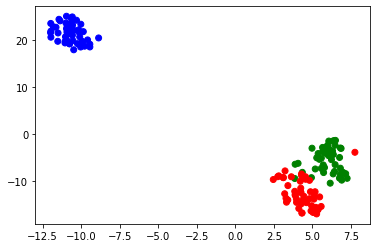

In [80]:
#scatteroplot of the TSNE data
plt.scatter(data_array_TSNE[:,0], data_array_TSNE[:,1], c =colour_list)

### KMeans
* Make a color_list_kmeans, and use it to make a scatter plot to compare with the real labels

In [ ]:
#K-means: you have to tell it how many clusters you want to see
#it'll then set a 'centre' and assign values to a cluster based on the nearest cluster (lowest distance)

In [84]:
from sklearn.cluster import KMeans

In [102]:
#use KMeans to assign clusters to the dataset

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_array)
kmeans

KMeans(n_clusters=3, random_state=0)

In [103]:
#use K-means clustering data to make a list called colour_list_kmeans from the target data 
#new part is kmeans.labels_ which is thrown out of the kmeans step above and contains the data you need

colour_list_kmeans = []
for value in kmeans.labels_:
    if value == 0:
        colour_list_kmeans.append('cyan')
    elif value == 1:
        colour_list_kmeans.append('magenta')
    elif value == 2:
        colour_list_kmeans.append('yellow')
    else:
        print('something went wrong')

In [104]:
print(colour_list_kmeans)

['magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'cyan', 'cyan', 'yellow', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'yellow', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'yellow', 'cyan', 'yellow', 'yellow', 'yellow

Text(0, 0.5, 'sepal width (cm)')

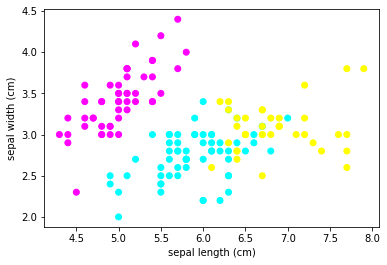

In [106]:
#plotting the 2D scatter plot using the scatter function (same function as before but c is changed to colour_list_kmeans

plt.scatter(data_array[:,0], data_array[:,1], c=colour_list_kmeans)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])